### OpenStreetMap

overpy: A Python wrapper for the Overpass API, which allows you to fetch OSM data for a given area and perform queries on the data.

This modified version of the extract_features function accepts an additional input parameter, distance, which allows the user to define the distance for the bounding box. The distance parameter has a default value of 50 km, which is used if no value is provided. If a location description is provided as input, the osmnx package is used to generate a bounding box from the location using the specified distance.

In [45]:
import osmnx as ox
import pandas as pd

# Set the location (latitude and longitude)
location = (38.64879, -77.29667)

# Download the OpenStreetMap data for the location, focusing on highway motorway_junctions
# Extract and plot highway motorway junctions within 400m from location of imagery from the number one accident location
mytags = {'highway': True, 'building': True, 'amenity': True, 'name': True, 'natural': True, 'landuse': True, 'height': True, 'area': True, 'source': True}

gdf = ox.geometries.geometries_from_point(location,tags = mytags, dist=100).reset_index()


USing OSM we can extract tagged features within a specified radius or within a specified area, such as an image. We can use these tags to support tagging imagery in an automated capacity. Once the imagery is tagged it could potionally be used in a ML or AI model that learns from the tagged imagery and then automattically genterates captions for new imagery.

In [51]:
# For each element type == node, concatenate the columns of the node's tags which are strings into a single string
gdf['tags'] = gdf.apply(lambda row: ' '.join([str(row[col]) for col in gdf.columns if row[col] is not None and type(row[col]) is str]), axis=1)

# Combine the tags of all elements into a single string
tagged_str = gdf['tags'].str.cat(sep=' ')

# For the name column, add additional 5 tags to the string 
tagged_str = tagged_str + ' ' + gdf['name'].str.cat(sep=' ')

# Convert the string to lowercase
tagged_str = tagged_str.lower()

# Remove way, node, and relation, yes, no, none from the string
tagged_str = tagged_str.replace('way', '').replace('node', '').replace('relation', '').replace('yes', '').replace('no', '').replace('none', '')

# Remove the numbers from the string
tagged_str = ''.join([i for i in tagged_str if not i.isdigit()])

# Remove the punctuation from the string
tagged_str = tagged_str.replace(',', '').replace('.', '').replace(';', '').replace(':', '').replace('(', '').replace(')', '').replace('=', '').replace('?', '').replace('!', '').replace('-', '').replace('_', '').replace('/', '').replace('"', '').replace("'", '')

# Remove the extra spaces from the string
tagged_str = ' '.join(tagged_str.split())

# Remove the words with less than 3 characters from the string
tagged_str = ' '.join([word for word in tagged_str.split() if len(word) > 2])

# Remove the words with more than 20 characters from the string
tagged_str = ' '.join([word for word in tagged_str.split() if len(word) < 20])

# Count how many unique words are in the string, print the top 20 words
tagged_str_counts = pd.Series(tagged_str.split()).value_counts()
tagged_str_counts.nunique()
tagged_str_counts.head(20)

# Count the unique word pairs in the string, print the top 20 word pairs
tagged_str_pairs_count = pd.Series([' '.join(pair) for pair in zip(tagged_str.split()[:-1], tagged_str.split()[1:])]).value_counts()
tagged_str_pairs_count.nunique()
tagged_str_pairs_count.head(20)

# Count the unique word trigrams in the string, print the top 20 word pairs
tagged_str_trigrams_count = pd.Series([' '.join(pair) for pair in zip(tagged_str.split()[:-2], tagged_str.split()[1:-1], tagged_str.split()[2:])]).value_counts()
tagged_str_trigrams_count.nunique()
tagged_str_trigrams_count.head(20)

permissive asphalt parkingaisle    60
service bing permissive            60
bing permissive asphalt            60
asphalt parkingaisle service       59
parkingaisle service bing          48
service survey permissive          24
permissive asphalt prince          24
asphalt prince william             24
survey permissive asphalt          24
prince william service             17
permissive asphalt drive           12
scale imagery permissive           12
imagery permissive asphalt         12
asphalt drive service              11
drive service survey               11
william service bing               11
parkingaisle service usgs          10
parkingaisle service survey         7
walmart supercenter walmart         6
commercial walmart supercenter      6
dtype: int64

<AxesSubplot:>

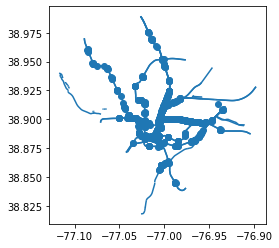

In [ ]:
# Extract all geometries associated with a railway in DC
gdf = ox.geometries.geometries_from_place(query='Washington DC', tags={'railway':True})
gdf.plot()

<AxesSubplot:>

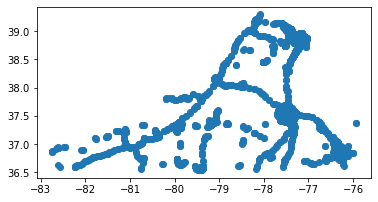

In [ ]:
#extract all motorway junctions in virginia, perhaps a 3d array model could take motorway junction as an input
#this in raster form becomes a predictor or feature for predicting car accidents
gdf = ox.geometries.geometries_from_place(query='Virginia', tags={'highway':'motorway_junction'})
gdf.plot()

<AxesSubplot:>

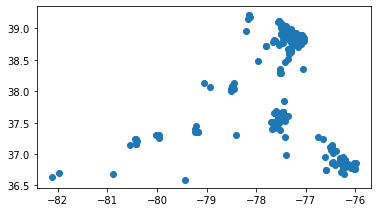

In [ ]:
#extract all motorway junctions in virginia, perhaps a 3d array model could take motorway junction as an input
#this in raster form becomes a predictor or feature for predicting car accidents
gdf = ox.geometries.geometries_from_place(query='Virginia', tags={'name':'Starbucks'})
gdf.plot()

In [ ]:
gdf

addr:city addr:country addr:housenumber  \
element_type osmid                                                      
node         570170288       Blacksburg           US              880   
             937148247       Blacksburg           US              NaN   
             2316616641             NaN          NaN              NaN   
             2899662577  Christiansburg          NaN             2457   
             4209864000             NaN          NaN              NaN   
...                                 ...          ...              ...   
way          1059389525             NaN          NaN              NaN   
node         8319606980             NaN          NaN              NaN   
             2518783074             NaN          NaN              NaN   
             7211892359        Abingdon          NaN              151   
             3095001697             NaN          NaN              NaN   

                        addr:postcode addr:state                addr:street  \
element_type osmid                                                            
node         570170288          24060         VA  University City Boulevard   
             937148247            NaN         VA          South Main Street   
             2316616641           NaN        NaN                        NaN   
             2899662577         24073        NaN      North Franklin Street   
             4209864000           NaN        NaN                        NaN   
...                               ...        ...                        ...   
way          1059389525           NaN        NaN                        NaN   
node         8319606980           NaN        NaN                        NaN   
             2518783074           NaN        NaN                        NaN   
             7211892359         24210         VA                Cook Street   
             3095001697           NaN        NaN                        NaN   

                        amenity      brand brand:wikidata brand:wikipedia  \
element_type osmid                                                          
node         570170288     cafe  Starbucks         Q37158    en:Starbucks   
             937148247     cafe  Starbucks         Q37158    en:Starbucks   
             2316616641    cafe  Starbucks         Q37158    en:Starbucks   
             2899662577    cafe  Starbucks         Q37158    en:Starbucks   
             4209864000    cafe  Starbucks         Q37158    en:Starbucks   
...                         ...        ...            ...             ...   
way          1059389525    cafe  Starbucks         Q37158             NaN   
node         8319606980    cafe  Starbucks         Q37158    en:Starbucks   
             2518783074    cafe  Starbucks         Q37158    en:Starbucks   
             7211892359    cafe  Starbucks         Q37158    en:Starbucks   
             3095001697    cafe  Starbucks         Q37158    en:Starbucks   

                             cuisine internet_access       name  \
element_type osmid                                                
node         570170288   coffee_shop            wlan  Starbucks   
             937148247   coffee_shop             yes  Starbucks   
             2316616641  coffee_shop             NaN  Starbucks   
             2899662577  coffee_shop             NaN  Starbucks   
             4209864000  coffee_shop            wlan  Starbucks   
...                              ...             ...        ...   
way          1059389525  coffee_shop             NaN  Starbucks   
node         8319606980  coffee_shop             NaN  Starbucks   
             2518783074  coffee_shop             NaN  Starbucks   
             7211892359  coffee_shop             NaN  Starbucks   
             3095001697  coffee_shop             NaN  Starbucks   

                            official_name   operator takeaway  \
element_type osmid                                              
node         570170288   Starbucks Coffee  Starb